<a href="https://colab.research.google.com/github/sthamamta/fm_intern_task/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [186]:
#loading data
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [187]:
link ="https://drive.google.com/file/d/1vmHrT9VXix5TKdx-PBsOtxeAjqEP9fks/view?usp=sharing"
id = "1vmHrT9VXix5TKdx-PBsOtxeAjqEP9fks"

import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')

In [188]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [189]:
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df.head()

,column_name,percent_missing
COMMONAREA_MEDI,COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,COMMONAREA_AVG,69.872297
COMMONAREA_MODE,COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,69.432963


In [190]:
#dropping columns that have more than 50% of missing value
missing_cols=[]
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 50:
        missing_cols.append(index)
df.drop(missing_cols, axis=1, inplace=True)

In [191]:
df.shape

(307511, 81)

In [192]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0

In [193]:
# df.info()

In [194]:
# see if there are any more columns with missing values 
null_columns = df.columns[df.isnull().any()]
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64

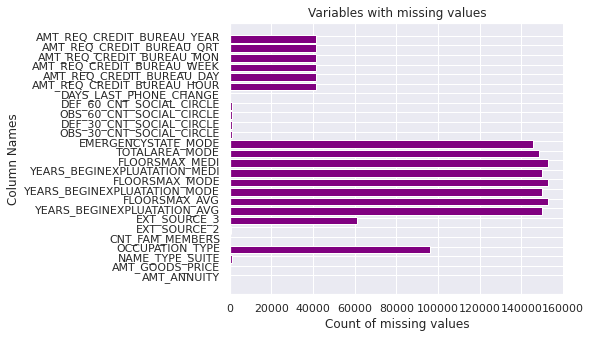

In [195]:
sns.set(font_scale=1)

# pd.options.display.mpl_style = 'default'
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

In [196]:
# df.hist(bins=10,figsize=(9,7),grid=False);

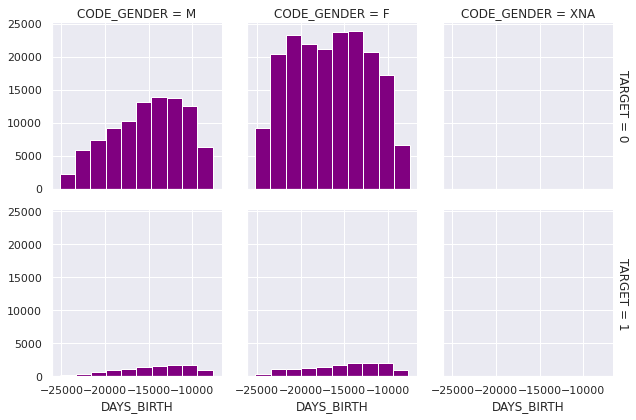

In [197]:
g = sns.FacetGrid(df, col="CODE_GENDER", row="TARGET", margin_titles=True)
g.map(plt.hist, "DAYS_BIRTH",color="purple");

In [198]:
df['OCCUPATION_TYPE'].isnull().sum()

96391

In [199]:
df['CODE_GENDER'].isnull().mean()

0.0

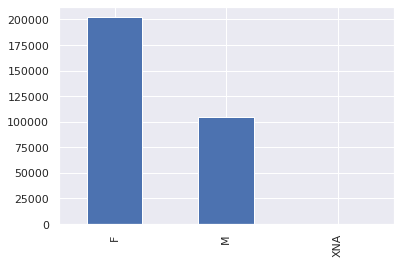

In [200]:
df['CODE_GENDER'].value_counts().plot.bar()
plt.show()

In [201]:
numeric_lst = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)

In [202]:
numeric_df = df[numerical_cols]

In [203]:
categorical_df = df[set(df.columns)- set(numeric_df.columns)]

In [204]:
categorical_df['TARGET'] = df['TARGET']

**2.Handling Categorical Variable**

In [205]:
categorical_df.isnull().sum()

FLAG_OWN_REALTY                    0
CODE_GENDER                        0
NAME_HOUSING_TYPE                  0
NAME_EDUCATION_TYPE                0
ORGANIZATION_TYPE                  0
OCCUPATION_TYPE                96391
NAME_INCOME_TYPE                   0
NAME_FAMILY_STATUS                 0
NAME_CONTRACT_TYPE                 0
NAME_TYPE_SUITE                 1292
EMERGENCYSTATE_MODE           145755
WEEKDAY_APPR_PROCESS_START         0
FLAG_OWN_CAR                       0
TARGET                             0
dtype: int64

In [206]:
categorical_df.shape

(307511, 14)

There are thirteen categorical column and one target column. Only three of them have missing values

**2.1 handling missing value in NAME_TYPE_SUITE column**

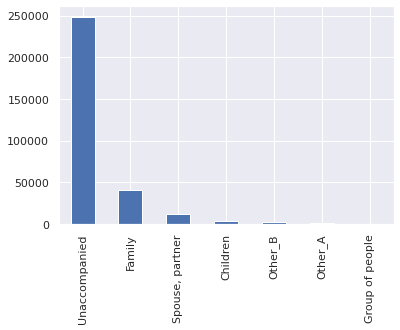

In [207]:
# first looking at NAME_TYPE_SUITE categorical column
categorical_df['NAME_TYPE_SUITE'].value_counts().plot.bar()
plt.show()

In [208]:
#checking the proportion of each class of NAME_TYPE_SUITE categorical column
class_ratio_before = categorical_df.NAME_TYPE_SUITE.value_counts(normalize=True)
class_ratio_before

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

Almost 80% of the data belongs to class unaccompanied 

In [209]:
# filling nan values by maintaing each class ratio in NAME_TYPE_SUITE column

missing = categorical_df['NAME_TYPE_SUITE'].isnull()
categorical_df.loc[missing,'NAME_TYPE_SUITE'] = np.random.choice(class_ratio_before.index, size=len(categorical_df[missing]),p=class_ratio_before.values)


In [210]:
categorical_df['NAME_TYPE_SUITE'].isnull().sum()

0

In [211]:
class_ratio_after = categorical_df.NAME_TYPE_SUITE.value_counts(normalize=True)
class_ratio_after

Unaccompanied      0.811535
Family             0.131147
Spouse, partner    0.037150
Children           0.010683
Other_B            0.005772
Other_A            0.002832
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

Imputed the categorical column NAME_TYPE_SUITE  such that each class ratio before and after imputation is not changed

**2.2 handling missing value in EMERGENCYSTATE_MODE column**

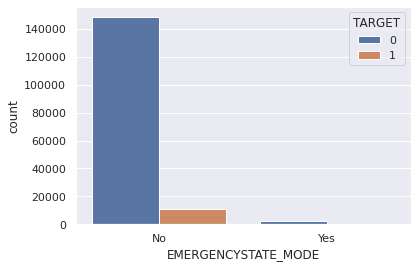

In [212]:

# categorical_df['EMERGENCYSTATE_MODE'].value_counts().plot.bar()
# plt.show()

ax = sns.countplot(x = "EMERGENCYSTATE_MODE", hue="TARGET", data = categorical_df)

In [213]:
#checking the proportion of each class of EMERGENCYSTATE_MODE categorical column
class_ratio_before = categorical_df.EMERGENCYSTATE_MODE.value_counts(normalize=True)
class_ratio_before

No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64

In [214]:
# filling nan values by maintaing each class ratio in NAME_TYPE_SUITE column

missing = categorical_df['EMERGENCYSTATE_MODE'].isnull()
categorical_df.loc[missing,'EMERGENCYSTATE_MODE'] = np.random.choice(class_ratio_before.index, size=len(categorical_df[missing]),p=class_ratio_before.values)


In [215]:
class_ratio_after = categorical_df.EMERGENCYSTATE_MODE.value_counts(normalize=True)
class_ratio_after

No     0.985373
Yes    0.014627
Name: EMERGENCYSTATE_MODE, dtype: float64

In [216]:
categorical_df['EMERGENCYSTATE_MODE'].isnull().sum()

0

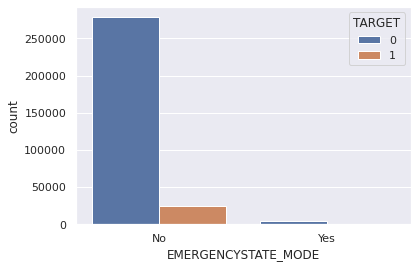

In [217]:
# count plot after imputation is almost same as well
ax = sns.countplot(x = "EMERGENCYSTATE_MODE", hue="TARGET", data = categorical_df)

**2.3 Handling missing value for OCCUPATION_TYPE column**

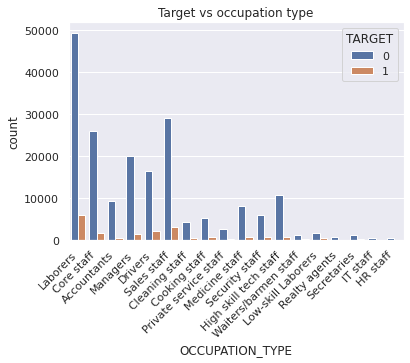

In [218]:
ax = sns.countplot(x = "OCCUPATION_TYPE", hue="TARGET", data = categorical_df)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.title('Target vs occupation type')
plt.show()

In [219]:
# df.head()

In [220]:
#visualization part
range_min = pd.DataFrame(df.groupby('OCCUPATION_TYPE', as_index=True)['AMT_CREDIT'].min()/100)
range_max = pd.DataFrame(df.groupby('OCCUPATION_TYPE', as_index=True)['AMT_CREDIT'].max()/100)


In [221]:
#visualization part
range = pd.DataFrame({'min': range_min['AMT_CREDIT'],'max': range_max['AMT_CREDIT']})
# range

In [222]:
#checking the proportion of each class of OCCUPAPTION_TYPE categorical column
class_ratio_before = categorical_df.OCCUPATION_TYPE.value_counts(normalize=True)
# class_ratio_before

In [223]:
# filling nan values by maintaing each class ratio in NAME_TYPE_SUITE column
missing = categorical_df['OCCUPATION_TYPE'].isnull()
categorical_df.loc[missing,'OCCUPATION_TYPE'] = np.random.choice(class_ratio_before.index, size=len(categorical_df[missing]),p=class_ratio_before.values)


In [224]:
categorical_df['AMT_CREDIT'] = df['AMT_CREDIT']

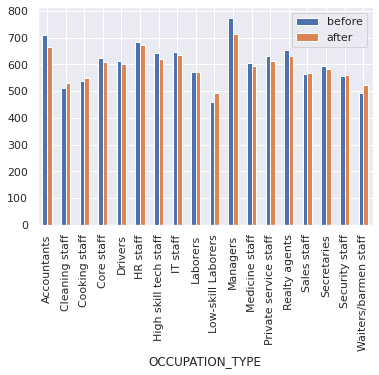

In [225]:
# checking mean income before and after imputation for each occupation type
before_mean = pd.DataFrame(df.groupby('OCCUPATION_TYPE', as_index=True)['AMT_CREDIT'].mean()/1000)
after_mean = pd.DataFrame(categorical_df.groupby('OCCUPATION_TYPE', as_index=True)['AMT_CREDIT'].mean()/1000)

compare_mean = pd.DataFrame({'before': before_mean['AMT_CREDIT'],'after': after_mean['AMT_CREDIT']})
compare_mean.plot.bar()
plt.show()

After the imputation of null values in occupation type column, the mean anuual income of each occupation has changed slightly. For Manager it has decreased and for low skill labor it has increased.

In [226]:
categorical_df.drop('AMT_CREDIT', axis= 'columns', inplace=True)

In [227]:
categorical_df.head()

,FLAG_OWN_REALTY,CODE_GENDER,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE,NAME_TYPE_SUITE,EMERGENCYSTATE_MODE,WEEKDAY_APPR_PROCESS_START,FLAG_OWN_CAR,TARGET
0,Y,M,House / apartment,Secondary / secondary special,Business Entity Type 3,Laborers,Working,Single / not married,Cash loans,Unaccompanied,No,WEDNESDAY,N,1
1,N,F,House / apartment,Higher education,School,Core staff,State servant,Married,Cash loans,Family,No,MONDAY,N,0
2,Y,M,House / apartment,Secondary / secondary special,Government,Laborers,Working,Single / not married,Revolving loans,Unaccompanied,No,MONDAY,Y,0
3,Y,F,House / apartment,Secondary / secondary special,Business Entity Type 3,Laborers,Working,Civil marriage,Cash loans,Unaccompanied,No,WEDNESDAY,N,0
4,Y,M,House / apartment,Secondary / secondary special,Religion,Core staff,Working,Single / not married,Cash loans,Unaccompanied,No,THURSDAY,N,0


In [228]:
categorical_cols = categorical_df.select_dtypes(include=['object'])

In [229]:
#label encoding categorical columns
from sklearn.preprocessing import LabelEncoder

cat_le = categorical_cols.apply(LabelEncoder().fit_transform)
cat_le['TARGET'] = categorical_df['TARGET']

#finding important features from categorical values
correlation_cat = cat_le.corr()
correlation_cat.sort_values(["TARGET"], ascending = False, inplace = True)
correlation_cat.TARGET

TARGET                        1.000000
NAME_EDUCATION_TYPE           0.054699
CODE_GENDER                   0.054692
NAME_INCOME_TYPE              0.046829
NAME_HOUSING_TYPE             0.034489
OCCUPATION_TYPE               0.014519
NAME_TYPE_SUITE               0.008382
EMERGENCYSTATE_MODE           0.005556
WEEKDAY_APPR_PROCESS_START    0.004002
NAME_FAMILY_STATUS           -0.004127
FLAG_OWN_REALTY              -0.006148
FLAG_OWN_CAR                 -0.021851
ORGANIZATION_TYPE            -0.030765
NAME_CONTRACT_TYPE           -0.030896
Name: TARGET, dtype: float64

In [230]:
cat_le.shape

(307511, 14)

**3. HANDLING NUMERICAL COLUMNS**

In [231]:
numeric_df.shape

(307511, 68)

There are total sixty eight numeric columns 

In [232]:
#seperating binary values columns

bool_cols = [col for col in numeric_df if 
               numeric_df[col].dropna().value_counts().index.isin([0,1]).all()]
bool_df = numeric_df[bool_cols]
bool_df.shape

(307511, 33)

In [233]:
bool_df.head()

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


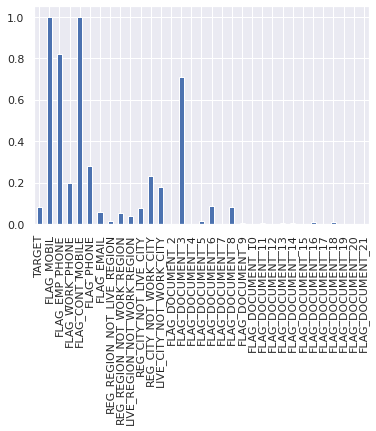

In [234]:
df_mean = bool_df[bool_df.columns].mean()
df_mean.plot.bar()

Most of the value in flag_document columns have values 0

In [235]:
not_bool_df = numeric_df[set(numeric_df.columns) - set(bool_cols)]
not_bool_df.shape

(307511, 35)

In [236]:
not_bool_df['CNT_FAM_MEMBERS']

0         1.0
1         2.0
2         1.0
3         2.0
4         1.0
         ... 
307506    1.0
307507    1.0
307508    1.0
307509    2.0
307510    2.0
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: float64

out of 68 numeric columns, 35 are not boolean

In [237]:
# checking null values 
not_bool_df.isnull().sum()

REGION_RATING_CLIENT_W_CITY          0
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
EXT_SOURCE_3                     60965
DEF_30_CNT_SOCIAL_CIRCLE          1021
AMT_INCOME_TOTAL                     0
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_WEEK       41519
REGION_POPULATION_RELATIVE           0
OBS_30_CNT_SOCIAL_CIRCLE          1021
AMT_REQ_CREDIT_BUREAU_YEAR       41519
CNT_CHILDREN                         0
AMT_CREDIT                           0
YEARS_BEGINEXPLUATATION_MODE    150007
HOUR_APPR_PROCESS_START              0
EXT_SOURCE_2                       660
AMT_REQ_CREDIT_BUREAU_DAY        41519
REGION_RATING_CLIENT                 0
AMT_REQ_CREDIT_BUREAU_QRT        41519
FLOORSMAX_MODE                  153020
SK_ID_CURR                           0
FLOORSMAX_AVG                   153020
TOTALAREA_MODE                  148431
DEF_60_CNT_SOCIAL_CIRCLE          1021
YEARS_BEGINEXPLUATATION_AVG     150007
AMT_REQ_CREDIT_BUREAU_HOU

In [238]:
not_bool_df['CNT_FAM_MEMBERS'].value_counts().index[0]

2.0

In [239]:
#since there are only two null values in CNT_FAM_MEMBERS columns, filling nan values in this columns  with the most frequent value
# not_bool_df['CNT_FAM_MEMBERS'].value_counts().index[0]

not_bool_df['CNT_FAM_MEMBERS'].fillna(not_bool_df['CNT_FAM_MEMBERS'].value_counts().index[0],inplace=True)
not_bool_df['CNT_FAM_MEMBERS'].isnull().sum()

0

**3.1 checking for OBS_60_CNT_SOCIAL_CIRCLE column**

In [240]:
not_bool_df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()/not_bool_df.shape[0]

0.0033202064316398437

In [241]:
# not_bool_df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()
class_ratio = not_bool_df.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)
class_ratio

0.0      0.537264
1.0      0.159451
2.0      0.097119
3.0      0.065956
4.0      0.045502
5.0      0.030875
6.0      0.020715
7.0      0.014173
8.0      0.009416
9.0      0.006392
10.0     0.004356
11.0     0.002731
12.0     0.002023
13.0     0.001308
14.0     0.000777
15.0     0.000542
16.0     0.000447
17.0     0.000238
18.0     0.000160
19.0     0.000144
20.0     0.000098
21.0     0.000091
22.0     0.000065
23.0     0.000042
24.0     0.000039
25.0     0.000036
27.0     0.000016
29.0     0.000007
28.0     0.000003
344.0    0.000003
47.0     0.000003
26.0     0.000003
30.0     0.000003
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

About 53% percent of the data has value 0 in OBS_60_CNT_SOCIAL_CIRCLE column. only 0.3% data is null so we will fill in null values with mode class

In [242]:
# filling null values with mode value
not_bool_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0.0,inplace=True)
not_bool_df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

**3.2 Handling AMT_REQ_CREDIT_BUREAU_WEEK column**

In [243]:
not_bool_df['AMT_REQ_CREDIT_BUREAU_WEEK'].dropna().mean()

0.0343619356973142

In [244]:
not_bool_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()/not_bool_df.shape[0]


0.0    0.837225
1.0    0.026692
2.0    0.000647
3.0    0.000189
4.0    0.000111
6.0    0.000065
5.0    0.000033
8.0    0.000016
7.0    0.000007
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [245]:
not_bool_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()/not_bool_df.shape[0]

0.13501630835970097

13% of the data in column AMT_REQ_CREDIT_BUREAU_WEEK are null. If we fill na with only one(mode class), it will change the original proportion of classes in the column. Therefore we fill null values such that class proportion remains same

In [246]:

class_ratio_before = not_bool_df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)
class_ratio_before

missing = not_bool_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull()
not_bool_df.loc[missing,'AMT_REQ_CREDIT_BUREAU_WEEK'] = np.random.choice(class_ratio_before.index, size=len(not_bool_df[missing]),p=class_ratio_before.values)


In [247]:
not_bool_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

**3.3 HANDLING AMT_REQ_CREDIT_BUREAU_QRT COLUMN**

In [248]:
not_bool_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()/not_bool_df.shape[0]

0.13501630835970097

In [249]:
not_bool_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()/not_bool_df.shape[0]

0.0      0.700518
1.0      0.110116
2.0      0.046867
3.0      0.005584
4.0      0.001548
5.0      0.000208
6.0      0.000091
7.0      0.000023
8.0      0.000023
19.0     0.000003
261.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

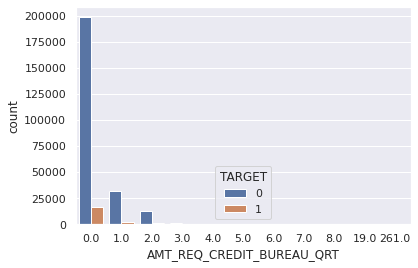

In [250]:
ax = sns.countplot(x = "AMT_REQ_CREDIT_BUREAU_QRT", hue="TARGET", data = df)

In [251]:
#filling nan values such that class ratio remains same after imputation
class_ratio_before = not_bool_df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)

missing = not_bool_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull()
not_bool_df.loc[missing,'AMT_REQ_CREDIT_BUREAU_QRT'] = np.random.choice(class_ratio_before.index, size=len(not_bool_df[missing]),p=class_ratio_before.values)


In [252]:
not_bool_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [253]:
percent_missing = not_bool_df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': not_bool_df.columns,
                                 'percent_missing': percent_missing})

In [254]:
missing_value_df

,column_name,percent_missing
REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,0.000000
AMT_GOODS_PRICE,AMT_GOODS_PRICE,0.090403
AMT_ANNUITY,AMT_ANNUITY,0.003902
EXT_SOURCE_3,EXT_SOURCE_3,19.825307
DEF_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,0.000000
DAYS_LAST_PHONE_CHANGE,DAYS_LAST_PHONE_CHANGE,0.000325
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,0.000000
REGION_POPULATION_RELATIVE,REGION_POPULATION_RELATIVE,0.000000
OBS_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.332021


In [255]:
#dropping columns that have more than 50% of missing value
missing_cols=[]
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 40:
        missing_cols.append(index)
df.drop(missing_cols, axis=1, inplace=True)

In [256]:
not_bool_df.shape

(307511, 35)

In [257]:
not_bool_df.drop(missing_cols, axis=1, inplace=True)

In [258]:
not_bool_df.shape

(307511, 28)

**3.4 CHECKING CORRELATION BETWEEN AMT_REQ_CREDIT_BUREU columns**


In [259]:
# checking null values after dropping columns with null values more than 40% 
not_bool_df.isnull().sum()

REGION_RATING_CLIENT_W_CITY        0
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
EXT_SOURCE_3                   60965
DEF_30_CNT_SOCIAL_CIRCLE        1021
AMT_INCOME_TOTAL                   0
DAYS_LAST_PHONE_CHANGE             1
AMT_REQ_CREDIT_BUREAU_WEEK         0
REGION_POPULATION_RELATIVE         0
OBS_30_CNT_SOCIAL_CIRCLE        1021
AMT_REQ_CREDIT_BUREAU_YEAR     41519
CNT_CHILDREN                       0
AMT_CREDIT                         0
HOUR_APPR_PROCESS_START            0
EXT_SOURCE_2                     660
AMT_REQ_CREDIT_BUREAU_DAY      41519
REGION_RATING_CLIENT               0
AMT_REQ_CREDIT_BUREAU_QRT          0
SK_ID_CURR                         0
DEF_60_CNT_SOCIAL_CIRCLE        1021
AMT_REQ_CREDIT_BUREAU_HOUR     41519
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
DAYS_REGISTRATION                  0
AMT_REQ_CREDIT_BUREAU_MON      41519
OBS_60_CNT_SOCIAL_CIRCLE           0
CNT_FAM_MEMBERS                    0
D

In [260]:
bureu_cols = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_DAY',
              'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','TARGET']

bureu_df = df[bureu_cols].copy()

In [261]:
bureu_df.head()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,TARGET
0,1.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0
3,NaN,NaN,NaN,NaN,NaN,0
4,0.0,0.0,0.0,0.0,0.0,0


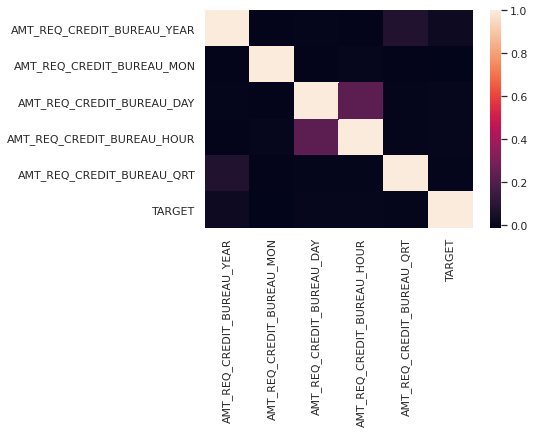

In [262]:
# calculate the correlation matrix
corr = bureu_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Only AMT_REQ_CREDIT_BUREU_YEAR is correlated with target variable. So we need to drop other columns.

In [263]:
not_bool_df.shape

(307511, 28)

In [264]:
df.shape

(307511, 74)

In [265]:
#droping other columns
drop_col_list = ['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_DAY',
              'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']

df.drop(drop_col_list, axis=1,inplace=True)
not_bool_df.drop(drop_col_list,axis=1, inplace=True)

print(not_bool_df.shape)
print(df.shape)


(307511, 24)
(307511, 70)


In [267]:
not_bool_df['TARGET']=df['TARGET']

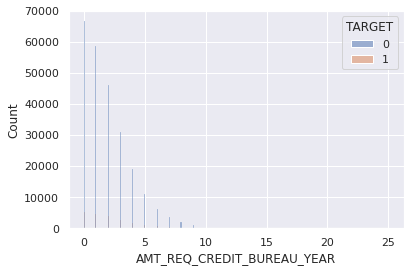

In [268]:
ax = sns.histplot(x = "AMT_REQ_CREDIT_BUREAU_YEAR", hue="TARGET", data = not_bool_df)

In [269]:
# fillinng in null values so that class ratio remains same 
s = not_bool_df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)
missing = not_bool_df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull()
not_bool_df.loc[missing,'AMT_REQ_CREDIT_BUREAU_YEAR'] = np.random.choice(s.index, size=len(not_bool_df[missing]),p=s.values)

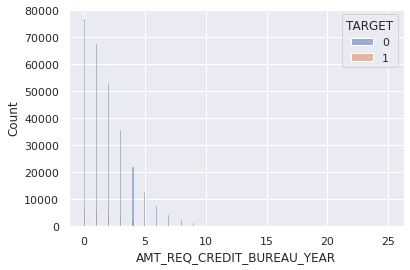

In [270]:
ax = sns.histplot(x = "AMT_REQ_CREDIT_BUREAU_YEAR", hue="TARGET", data = not_bool_df)

In [271]:
# checking null values after dropping columns with null values more than 40% 
not_bool_df.isnull().sum()

REGION_RATING_CLIENT_W_CITY        0
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
EXT_SOURCE_3                   60965
DEF_30_CNT_SOCIAL_CIRCLE        1021
AMT_INCOME_TOTAL                   0
DAYS_LAST_PHONE_CHANGE             1
AMT_REQ_CREDIT_BUREAU_WEEK         0
REGION_POPULATION_RELATIVE         0
OBS_30_CNT_SOCIAL_CIRCLE        1021
AMT_REQ_CREDIT_BUREAU_YEAR         0
CNT_CHILDREN                       0
AMT_CREDIT                         0
HOUR_APPR_PROCESS_START            0
EXT_SOURCE_2                     660
REGION_RATING_CLIENT               0
SK_ID_CURR                         0
DEF_60_CNT_SOCIAL_CIRCLE        1021
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
DAYS_REGISTRATION                  0
OBS_60_CNT_SOCIAL_CIRCLE           0
CNT_FAM_MEMBERS                    0
DAYS_ID_PUBLISH                    0
TARGET                             0
dtype: int64

**3.5 CHECKING FOR DEF_CNT_SOCIAL_CIRCLE**

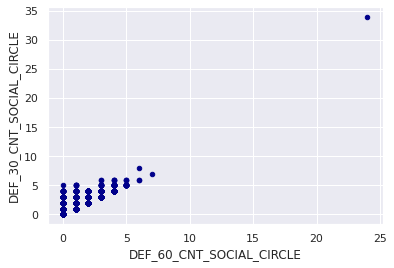

In [272]:
ax1 = not_bool_df.plot.scatter(x='DEF_60_CNT_SOCIAL_CIRCLE',
                      y='DEF_30_CNT_SOCIAL_CIRCLE',
                     c='DarkBlue')

In [273]:
correlation = not_bool_df['DEF_60_CNT_SOCIAL_CIRCLE']. corr(not_bool_df['DEF_30_CNT_SOCIAL_CIRCLE']) 
correlation

0.8605173800835166

DEF_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE columns are highly coorelated. So we drop one among them that , probabily one that has highest no of null values

In [274]:
print(not_bool_df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())
print(not_bool_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

1021
1021


In [275]:
not_bool_df['TARGET']= df['TARGET']

In [276]:
correlation_60 = not_bool_df['DEF_60_CNT_SOCIAL_CIRCLE']. corr(not_bool_df['TARGET']) 
correlation_30 = not_bool_df['DEF_30_CNT_SOCIAL_CIRCLE']. corr(not_bool_df['TARGET']) 
print(correlation_60)
print(correlation_30)

0.03127647212643636
0.03224757925304431


column DEF_30_CNT_SOCIAL_CIRCLE have slighlty higher correlation with target than other so we drop other column

In [277]:
df.drop(['DEF_60_CNT_SOCIAL_CIRCLE'], axis=1,inplace=True)
not_bool_df.drop(['DEF_60_CNT_SOCIAL_CIRCLE'],axis=1, inplace=True)

In [278]:
print(df.shape)
print(not_bool_df.shape)

(307511, 69)
(307511, 24)


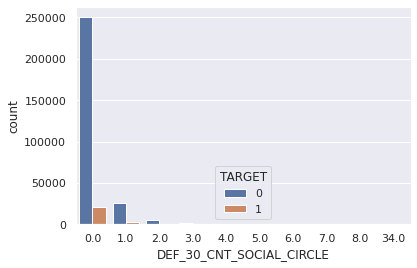

In [279]:
ax = sns.countplot(x = "DEF_30_CNT_SOCIAL_CIRCLE", hue="TARGET", data = not_bool_df)

In [280]:
not_bool_df['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()/not_bool_df.shape[0]

0.0     0.882323
1.0     0.092120
2.0     0.017310
3.0     0.003876
4.0     0.000823
5.0     0.000182
6.0     0.000036
7.0     0.000003
8.0     0.000003
34.0    0.000003
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [281]:
#filling nan values with 0 as it is the mode class and only 3% data is null in the column
not_bool_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace=True)
not_bool_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

**3.6 CHECKING FOR OBS_CNT_SOCIAL_CIRCLE**

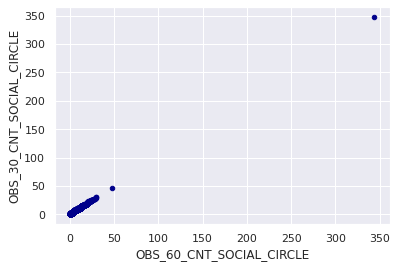

In [282]:
ax1 = not_bool_df.plot.scatter(x='OBS_60_CNT_SOCIAL_CIRCLE',
                      y='OBS_30_CNT_SOCIAL_CIRCLE',
                     c='DarkBlue')

In [283]:
correlation = not_bool_df['OBS_60_CNT_SOCIAL_CIRCLE']. corr(not_bool_df['OBS_30_CNT_SOCIAL_CIRCLE']) 
print(correlation)

0.9984895425109942


In [284]:
correlation_60 = not_bool_df['OBS_60_CNT_SOCIAL_CIRCLE']. corr(not_bool_df['TARGET']) 
correlation_30 = not_bool_df['OBS_30_CNT_SOCIAL_CIRCLE']. corr(not_bool_df['TARGET']) 
print(correlation_60)
print(correlation_30)


0.009337242924070914
0.00913066570277639


Since OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE columns are highly correlated with each other and column OBS_60_CNT_SOCIAL_CIRCLE has the highest correlation with target among them so we drop OBS_30_CNT_SOCIAL_CIRCLE column

In [285]:
not_bool_df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [286]:
# dropping OBS_60_CNT_SOCIAL_CIRCLE columns 
df.drop(['OBS_30_CNT_SOCIAL_CIRCLE'], axis=1,inplace=True)
not_bool_df.drop(['OBS_30_CNT_SOCIAL_CIRCLE'],axis=1, inplace=True)


In [287]:
print(df.shape)
print(not_bool_df.shape)

(307511, 68)
(307511, 23)


In [288]:
not_bool_df.isnull().sum()

REGION_RATING_CLIENT_W_CITY        0
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
EXT_SOURCE_3                   60965
DEF_30_CNT_SOCIAL_CIRCLE           0
AMT_INCOME_TOTAL                   0
DAYS_LAST_PHONE_CHANGE             1
AMT_REQ_CREDIT_BUREAU_WEEK         0
REGION_POPULATION_RELATIVE         0
AMT_REQ_CREDIT_BUREAU_YEAR         0
CNT_CHILDREN                       0
AMT_CREDIT                         0
HOUR_APPR_PROCESS_START            0
EXT_SOURCE_2                     660
REGION_RATING_CLIENT               0
SK_ID_CURR                         0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
DAYS_REGISTRATION                  0
OBS_60_CNT_SOCIAL_CIRCLE           0
CNT_FAM_MEMBERS                    0
DAYS_ID_PUBLISH                    0
TARGET                             0
dtype: int64

**3.7 CHECKING FOR EXT SOURCE**

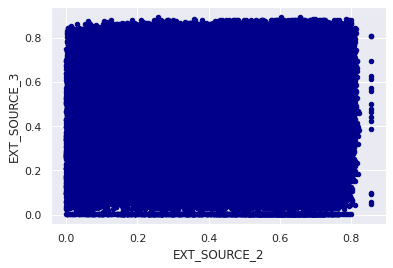

In [289]:
ax1 = not_bool_df.plot.scatter(x='EXT_SOURCE_2',
                      y='EXT_SOURCE_3',
                     c='DarkBlue')

In [290]:
correlation = not_bool_df['EXT_SOURCE_2']. corr(not_bool_df['EXT_SOURCE_3']) 
correlation

0.10916729237112612

correlation between ext source columns is low.

**3.7.1 HANDLING EXT_SOURCES column**





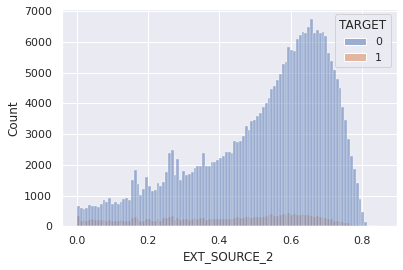

In [291]:
ax = sns.histplot(x = "EXT_SOURCE_2", hue="TARGET", data = not_bool_df)

The data distibution is left skewed for column EXT_SOURCE_2

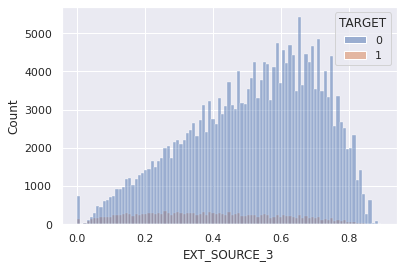

In [292]:
ax = sns.histplot(x = "EXT_SOURCE_3", hue="TARGET", data = not_bool_df)

In [293]:
correlation = not_bool_df['EXT_SOURCE_2']. corr(not_bool_df['TARGET']) 
correlation

-0.16047167160521006

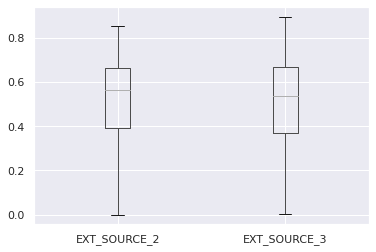

In [294]:
boxplot = not_bool_df.boxplot(column=['EXT_SOURCE_2', 'EXT_SOURCE_3'], return_type='axes')
plt.show()

Since there are no outlier in ext source columns so we replace nan values with mean

In [295]:
not_bool_df['EXT_SOURCE_2'].fillna((not_bool_df['EXT_SOURCE_2'].mean()), inplace=True)
not_bool_df['EXT_SOURCE_3'].fillna((not_bool_df['EXT_SOURCE_3'].mean()), inplace=True)

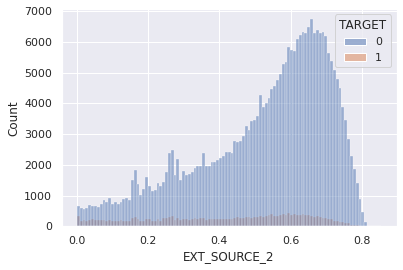

In [296]:
ax = sns.histplot(x = "EXT_SOURCE_2", hue="TARGET", data = not_bool_df)

The distribution of data hasnot changed after filling in nan values.

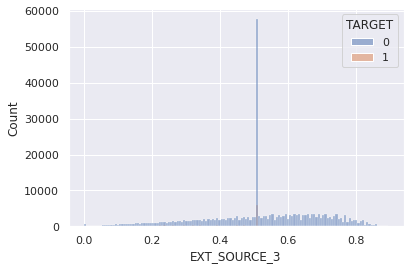

In [297]:
ax = sns.histplot(x = "EXT_SOURCE_3", hue="TARGET", data = not_bool_df)

In [298]:
df['EXT_SOURCE_3'].isnull().sum()

60965

distribution has changed drastically so we should not impute it with mean value as there were many nan values in the column about 60 thousands plus. So trying to fill nan values with random sample of actual values in this column

In [299]:

not_bool_df['EXT_SOURCE_3']=df['EXT_SOURCE_3'].copy()
s = not_bool_df.EXT_SOURCE_3.value_counts(normalize=True)
missing = not_bool_df['EXT_SOURCE_3'].isnull()
not_bool_df.loc[missing,'EXT_SOURCE_3'] = np.random.choice(s.index, size=len(not_bool_df[missing]),p=s.values)

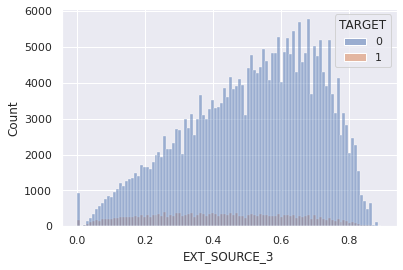

In [300]:
ax = sns.histplot(x = "EXT_SOURCE_3", hue="TARGET", data = not_bool_df)

Now the distribution before and after imputation looks almost similar

In [301]:
not_bool_df.isnull().sum()

REGION_RATING_CLIENT_W_CITY      0
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
EXT_SOURCE_3                     0
DEF_30_CNT_SOCIAL_CIRCLE         0
AMT_INCOME_TOTAL                 0
DAYS_LAST_PHONE_CHANGE           1
AMT_REQ_CREDIT_BUREAU_WEEK       0
REGION_POPULATION_RELATIVE       0
AMT_REQ_CREDIT_BUREAU_YEAR       0
CNT_CHILDREN                     0
AMT_CREDIT                       0
HOUR_APPR_PROCESS_START          0
EXT_SOURCE_2                     0
REGION_RATING_CLIENT             0
SK_ID_CURR                       0
DAYS_EMPLOYED                    0
DAYS_BIRTH                       0
DAYS_REGISTRATION                0
OBS_60_CNT_SOCIAL_CIRCLE         0
CNT_FAM_MEMBERS                  0
DAYS_ID_PUBLISH                  0
TARGET                           0
dtype: int64

**3.8 HANDLING AMT_ANNUITY column**

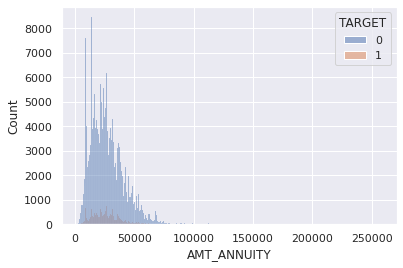

In [302]:
ax = sns.histplot(x = "AMT_ANNUITY", hue="TARGET", data = not_bool_df)

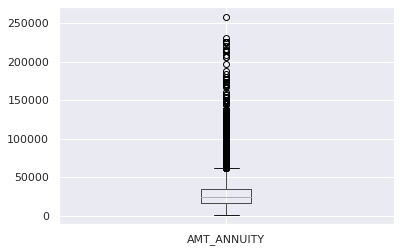

In [303]:
not_bool_df.boxplot(column=["AMT_ANNUITY"])
plt.show()

The distribution of AMT_ANNUNITY is right skewed and has many outliers so we replace nan values with median

In [304]:
not_bool_df['AMT_ANNUITY'].fillna((not_bool_df['AMT_ANNUITY'].median()), inplace=True)

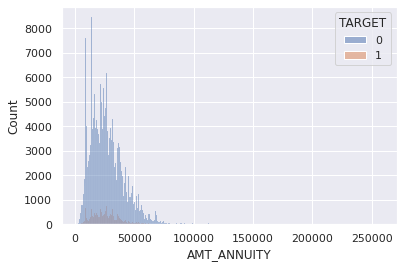

In [305]:
ax = sns.histplot(x = "AMT_ANNUITY", hue="TARGET", data = not_bool_df)

distribution hasnot changed much after filling in null values

In [306]:
not_bool_df['AMT_ANNUITY'].isnull().sum()

0

**3.8 HANDLING AMT_GOODS_PRICE column**

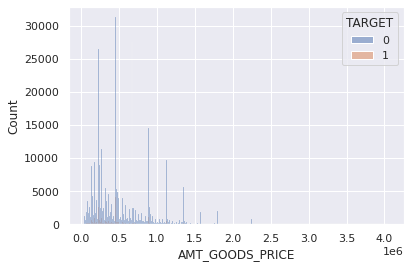

In [307]:
ax = sns.histplot(x = "AMT_GOODS_PRICE", hue="TARGET", data = not_bool_df)

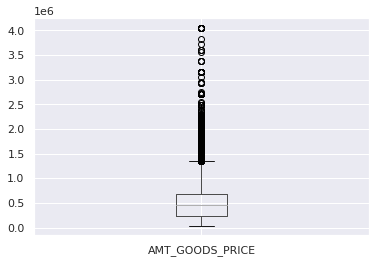

In [308]:
not_bool_df.boxplot(column=["AMT_GOODS_PRICE"])
plt.show()

In [309]:
not_bool_df['AMT_GOODS_PRICE'].isnull().sum()

278

In [310]:
not_bool_df['AMT_GOODS_PRICE'].fillna((not_bool_df['AMT_GOODS_PRICE'].median()), inplace=True)

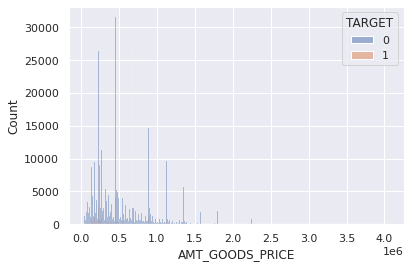

In [311]:
ax = sns.histplot(x = "AMT_GOODS_PRICE", hue="TARGET", data = not_bool_df)

**3.9 Handling outlier and feature transformation for numeric columns**

In [312]:
not_bool_df.columns

Index(['REGION_RATING_CLIENT_W_CITY', 'AMT_GOODS_PRICE', 'AMT_ANNUITY',
       'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_INCOME_TOTAL',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'REGION_POPULATION_RELATIVE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CNT_CHILDREN', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
       'REGION_RATING_CLIENT', 'SK_ID_CURR', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS',
       'DAYS_ID_PUBLISH', 'TARGET'],
      dtype='object')

In [313]:
not_bool_df['AGE'] = not_bool_df['DAYS_BIRTH']/(-365)
not_bool_df['YEAR_EMPLOYED'] = not_bool_df['DAYS_EMPLOYED']/(-365)

In [314]:
not_bool_df.drop(['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1)
not_bool_df['AGE'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE, dtype: float64

In [315]:
df.drop(['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,No,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,No,0.0,1.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,0.0,2.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,No,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,NaN,No,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-6737.0,-5150,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,No,0.0,6.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0
307509,456254,1,Cas

In [316]:
df[['AGE', 'DAYS_EMPLOYED']] = not_bool_df[['AGE', 'DAYS_EMPLOYED']]

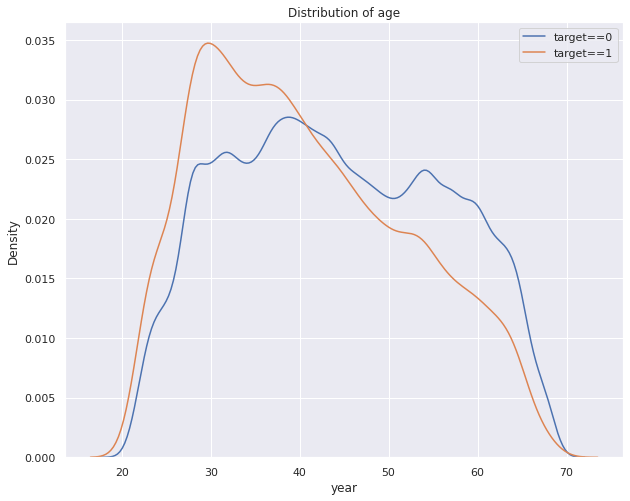

In [317]:
plt.figure(figsize=(10,8))

sns.kdeplot(df.loc[not_bool_df['TARGET']==0,'AGE'],label='target==0')

sns.kdeplot(df.loc[not_bool_df['TARGET']==1,'AGE'],label='target==1')

plt.xlabel('year');
plt.ylabel('Density');
plt.title('Distribution of age');
plt.legend()
plt.show()

People having age 30 is most likely to have target value 1

**4.HANDLING BOOLEAN CATEGORICAL COLUMNS**

In [318]:
bool_df.shape

(307511, 33)

In [319]:
correlation_bool = bool_df.corr()
correlation_bool.sort_values(["TARGET"], ascending = False, inplace = True)
correlation_bool.TARGET

TARGET                         1.000000
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
LIVE_CITY_NOT_WORK_CITY        0.032518
FLAG_WORK_PHONE                0.028524
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002819
FLAG_MOBIL                     0.000534
FLAG_CONT_MOBILE               0.000370
FLAG_DOCUMENT_20               0.000215
FLAG_DOCUMENT_5               -0.000316
FLAG_DOCUMENT_12              -0.000756
FLAG_DOCUMENT_19              -0.001358
FLAG_DOCUMENT_10              -0.001414
FLAG_DOCUMENT_7               -0.001520
FLAG_EMAIL                    -0.001758
FLAG_DOCUMENT_4               -0.002672
FLAG_DOCUMENT_17              -0.003378
FLAG_DOCUMENT_11              -0.004229
FLAG_DOCUMENT_9               -0.004352


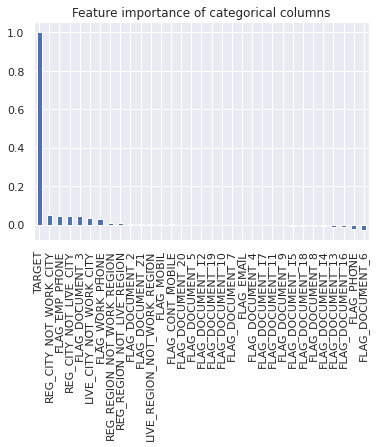

In [320]:
figsize = (14, 18)
correlation_bool.TARGET.plot.bar()
plt.title("Feature importance of categorical columns");
plt.show()

In [321]:
bool_df.columns

Index(['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

MOST OF THE COLUMNS HAVE NO CORRELATION WITH TARGET VARIABLE SO WE NEED TO DROP THESE COLUMNS

In [322]:
dropping_cols = set(bool_df.columns)- set(['REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','REG_CITY_NOT_LIVE_CITY',
                                           'FLAG_DOCUMENT_3','LIVE_CITY_NOT_WORK_CITY','FLAG_WORK_PHONE'])

bool_df.drop(dropping_cols, axis=1, inplace=True)

In [323]:
bool_df.shape

(307511, 6)

In [324]:
bool_df.isnull().sum()

FLAG_EMP_PHONE             0
FLAG_WORK_PHONE            0
REG_CITY_NOT_LIVE_CITY     0
REG_CITY_NOT_WORK_CITY     0
LIVE_CITY_NOT_WORK_CITY    0
FLAG_DOCUMENT_3            0
dtype: int64